1.12.1
True
True
Files already downloaded and verified
Files already downloaded and verified


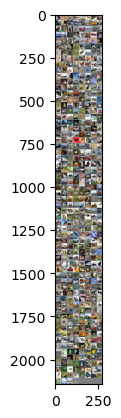

plane frog  bird  ship  deer  deer  frog  truck bird  cat   car   ship  dog   ship  plane car   dog   dog   deer  dog   car   ship  truck truck ship  horse bird  dog   dog   frog  car   cat   deer  frog  cat   truck plane cat   cat   cat   horse horse cat   bird  cat   ship  horse ship  bird  horse deer  bird  cat   ship  cat   cat   dog   dog   dog   car   truck deer  car   horse frog  dog   ship  car   dog   horse truck plane bird  horse deer  cat   dog   plane horse car   horse ship  cat   plane car   ship  deer  deer  cat   cat   bird  car   truck dog   ship  deer  car   cat   truck cat   frog  dog   deer  bird  cat   dog   truck car   plane ship  ship  horse horse horse frog  deer  bird  ship  plane plane bird  dog   deer  dog   truck truck deer  ship  horse car   bird  ship  bird  horse truck car   truck horse deer  car   bird  plane car   deer  car   truck truck horse horse truck horse horse horse horse dog   truck dog   deer  bird  deer  cat   horse plane ship  truck plane hors

100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.38it/s]


[1,   101] loss: 0.018


100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.57it/s]


[2,   101] loss: 0.018


100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.57it/s]


[3,   101] loss: 0.018


100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.58it/s]


[4,   101] loss: 0.018


100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.57it/s]


[5,   101] loss: 0.018


100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.58it/s]


[6,   101] loss: 0.018


100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.56it/s]


[7,   101] loss: 0.018


100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.54it/s]


[8,   101] loss: 0.018


100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


[9,   101] loss: 0.018


100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.56it/s]


[10,   101] loss: 0.018


100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


[11,   101] loss: 0.018


100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.58it/s]


[12,   101] loss: 0.018


100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


[13,   101] loss: 0.017


100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.58it/s]


[14,   101] loss: 0.017


100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.57it/s]


[15,   101] loss: 0.017


100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


[16,   101] loss: 0.016


100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.46it/s]


[17,   101] loss: 0.016


100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.55it/s]


[18,   101] loss: 0.016


100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


[19,   101] loss: 0.015


100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]

[20,   101] loss: 0.015
Finished Training


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

print(torch.__version__)
print(torch.backends.mps.is_built())
print(torch.backends.mps.is_available())

device = torch.device("mps")
# device = torch.device("cpu")

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 500

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
           
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
images, labels = next(iter(trainloader))

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net = net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    i = 0 
    for data in tqdm(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        i += 1
        running_loss += loss.item()

    print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 12500:.3f}')


print('Finished Training')